# TP4: Decision trees & random forests
The aim of this tutorial is to get familiar with the use of decision trees and their generalizations on simple examples using `scikit-learn` tools.

## Completing your installation first
You will need to install packages `python-graphviz` first. If needed, uncomment the `conda` command below:

In [1]:
# If needed, uncomment the line below:

#conda install python-graphviz

# TODO / NOTES
- panda (~excel)
- praphviz => afficher arbre
- MAJ python : pyp conda

todo
- export tree pdf

In [2]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

# Load the library with the iris dataset
from sklearn.datasets import load_iris #, load_wine



# Load scikit's decision tree classifier
from sklearn import tree

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# To visualize trees
import graphviz 


# Load pandas to manipulate data frames (Excel like)
import pandas as pd

# Load numpy
#import numpy as np

# Set random seed
np.random.seed(0)

The data for this tutorial is famous. Called, **the iris dataset**, it contains four variables measuring various parts of iris flowers of three related species, and then a fourth variable with the species name. The reason it is so famous in machine learning and statistics communities is because the data requires very little preprocessing (i.e. no missing values, all features are floating numbers, etc.).

In [3]:
iris = load_iris()

## Step 1: explore the data set
1. What is the structure of the object `iris` ?

2. Plot this dataset in a well chosen set of representations to explore the data.




## Using `pandas` to manipulate the data
Pandas is great to manipulate data in a Microsoft Excel like way.

In [4]:
import pandas as pd

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
print("taille du dataset : ",len(df))
iris.feature_names

taille du dataset :  150


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

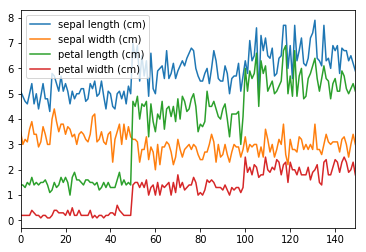

In [7]:
df.plot()
plt.show()

In [8]:
print(df['species'][30],df['species'][80],df['species'][120])

setosa versicolor virginica


In [9]:
np.where(df['species'] == 'setosa')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)

In [10]:
np.where(df['species'] == 'versicolor')

(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64),)

In [11]:
np.where(df['species'] == 'virginica')

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], dtype=int64),)

In [12]:
print(np.mean(df['sepal length (cm)']), np.mean(df["sepal width (cm)"]), np.mean(df["petal length (cm)"]), np.mean(df["petal width (cm)"]))
print()
print(np.std(df['sepal length (cm)']), np.std(df["sepal width (cm)"]), np.std(df["petal length (cm)"]), np.std(df["petal width (cm)"]))

5.843333333333335 3.0540000000000007 3.7586666666666693 1.1986666666666672

0.8253012917851409 0.4321465800705435 1.7585291834055201 0.760612618588172


A priori, en observant simplement les données, on voit deux points de rupture. On voit déjà que la première classe apparaît aux indices 0:50, la deuxième aux indices 50:100 puis la troisième.

On détecte que l'information la plus déterminante est donnée par la longueur des pétales, c'est là qu'on observe le plus grand écart entre les valeurs moyennes de chaque plage de données. On décide d'afficher le paramètre qui a la 2e plus grande variance en fonction de la longueur des pétales, en affichant les classes de couleurs différentes.

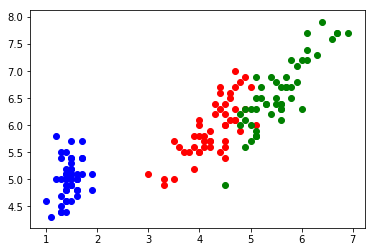

In [13]:
plt.scatter(df['petal length (cm)'][0:50],df['sepal length (cm)'][0:50],c='b')
plt.scatter(df['petal length (cm)'][50:100],df['sepal length (cm)'][50:100],c='r')
plt.scatter(df['petal length (cm)'][100:150],df['sepal length (cm)'][100:150],c='g')
plt.show()

## Step 2: create training and test sets

Create a new column that for each row, generates a random number between 0 and 1, and if that value is less than or equal to .75, then sets the value of that cell as True and false otherwise. This is a quick and dirty way of randomly assigning some rows to be used as the training data and some as the test data.

In [14]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [15]:
# Create two new dataframes, one with the training rows, one with the test rows
train = df[df['is_train']==True]
test = df[df['is_train']==False]

In [16]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [17]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [18]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y_classes = pd.factorize(train['species'])[0]

## Step 3: decision trees for the iris dataset
The method `tree.DecisionTreeClassifier()` from `scikit-learn` builds decision trees objects as follows:

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[features], y_classes)

# Using the whole dataset you may use directly:
# clf = clf.fit(iris.data, iris.target)

The `export_graphviz` exporter supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

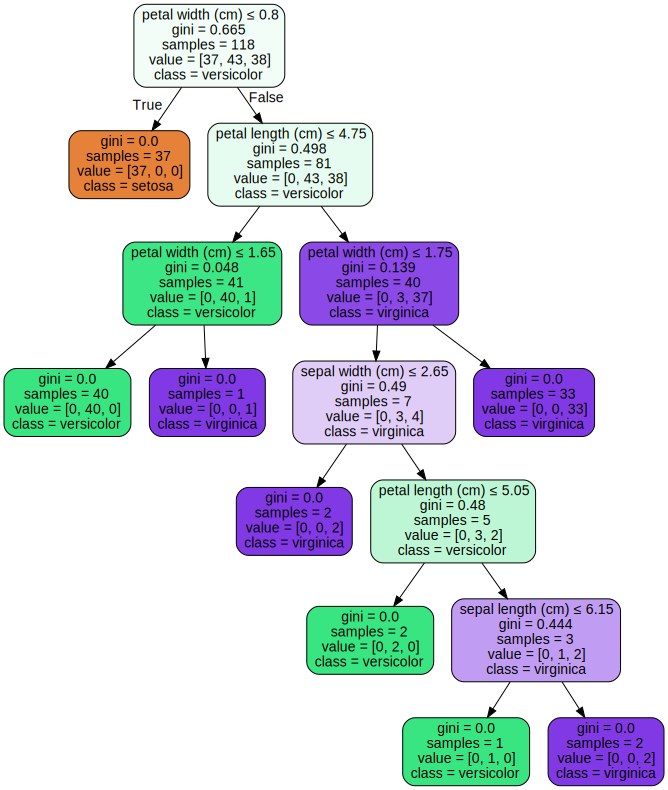

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

We can also export the tree in Graphviz format and  savethe resulting graph in an output file iris.pdf:

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris")

After being fitted, **the model can then be used to predict the class of samples**:

In [22]:
class_pred = clf.predict(test[features])
class_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Exercise 1
1. Train the decision tree on the iris dataset and explain how one should read blocks in `graphviz` representation of the tree.

2. Plot the regions of decision with the points of the training set superimposed.

*Indication: you may find the function `plt.contourf` useful.

**Observation de l'arbre**

Les lignes de chaque noeud décrivent, dans l'ordre :
- le critère de décision (inexistant si le noeud est une feuille)
- Gini est un critère qui mesure l'impureté du noeud (vaut 0 pour les feuilles), ce critère sert de critère d'arrêt
- Samples est la taille du sous-ensemble correspondant au noeud
- Value est la répartition des classes du sous-ensemble
- class est la classe majoritaire ; pour les feuilles, c'est la fonction de décision

A la première division, tous les seposa (classe 0) sont distingués du reste. C'est ce que l'on a trouvé qualitativement dans les préliminaires, à la vue du graphe, puisque cette classe était linéairement séparable, par projection sur une entrée.

Cet arbre a cependant un inconvénient majeur, puisque 3 niveaux de profondeur sont dédiés uniquement à classer 7 individus, ce qui rajoute de la complexité à l'arbre, et nuit donc à sa robustesse. Nous avons besoin d'un *jardinier* régularisant afin d'élaguer notre arbre.

In [23]:
class_reelle = pd.factorize(test['species'])[0]
erreur = len(np.where(class_pred != class_reelle)[0])/len(test)
print("Erreur sur l'ensemble de test = ", erreur*100, "%")

Erreur sur l'ensemble de test =  6.25 %


On obtient 1 ou 2 erreurs soit 2.6% ou 6.3%. Cette estimation n'est pas très fiable (de variance élevée) puisqu'on ne teste que sur 32 exemples.

On souhaite maintenant visualiser les frontières de décision dans un espace 2D compréhensible.

2 approches sont possibles : projeter simplement les données sur 2 des 4 entrées, ou bien faire une PCA pour extraire les 2 premières composantes principales sur lesquelles projeter les données.

**Visualisation avec PCA**

Nous allons faire une PCA des données afin de projeter les données et les décisions dans un espace 2D visualisable. Voici les étapes à suivre :
- PCA à 2 composantes des données (fournit en particulier une matrice de projection $\Sigma V^*$ de $R^4 \rightarrow R^2$ ; les 2 premières composantes principales $v_1$ et $v_2$ sont dans la matrice $V^*$).
- Faire la projection des données 4D pour en visualiser l'aspect en 2D. En particulier, récupérer les bornes min et max dans lesquelles elles vivent dans $Vect(v_1,v_2)$.
- Créer une grille 2D entre ces bornes.
- Faire la projection inverse de la grille, on obtient un ensemble de points contenus dans un plan 2D d'un espace 4D.
- Lancer la prédiction sur cet ensemble obtenu. On obtient une prédiction pour chaque point.
- Colorer les points de la grille 2D selon ces prédictions. On visualise alors une projection de la frontière de décision sur $Vect(v_1,v_2)$.

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(df[features])
proj = pca.transform(df[features])
proj.shape # projection en 2 Dimension

(150, 2)

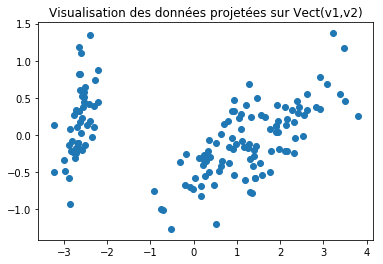

Bornes min et max :  [-3.22520045 -1.26249195] [ 3.79468686  1.37052404]


In [25]:
plt.scatter(proj[:,0],proj[:,1])
plt.title('Visualisation des données projetées sur Vect(v1,v2)')
plt.show()
print('Bornes min et max : ',np.min(proj,axis=0),np.max(proj,axis=0))

Choix de la méthode d'affichage des frontières (scatter ou contourf) :

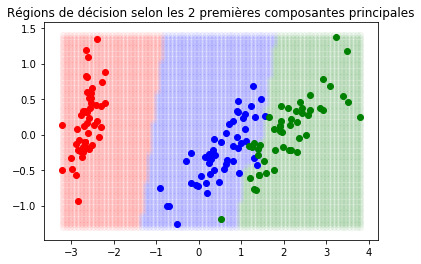

In [29]:
choix_render = 'scatter' # scatter ou contourf

NX = 80
NY = 80

x = np.linspace(-3.2,3.8,NX)
y = np.linspace(-1.3,1.4,NY)
xx, yy = np.meshgrid(x,y)
x = np.reshape(xx,(NX*NY,1))
y = np.reshape(yy,(NX*NY,1))
grid = np.hstack((x,y)) # grille 2D générée : dimension (NX*NY,2)

grid4 = pca.inverse_transform(grid) # grille apèrs projection inverse 4D
df_grid = pd.DataFrame(grid4, columns=iris.feature_names)

class_pred = clf.predict(df_grid) # prédiction

colors = ['r','b','g']

if choix_render == 'contourf':
    plt.contourf(xx,yy,np.reshape(class_pred,xx.shape))
elif choix_render == 'scatter':
    for i in range(3):
        plt.scatter(grid[class_pred==i][:,0],grid[class_pred==i][:,1],c=colors[i],alpha=0.05)
        #plt.pcolormesh(grid[class_pred==i][:,0],grid[class_pred==i][:,1],colors[i])
plt.scatter(proj[:50,0],proj[:50,1],c=colors[0])
plt.scatter(proj[50:100,0],proj[50:100,1],c=colors[1])
plt.scatter(proj[100:,0],proj[100:,1],c=colors[2])
plt.title('Régions de décision selon les 2 premières composantes principales')
plt.show()

## Exercise 2
1. Build 2 different trees based on a sepal features (sepal lengths, sepal widths) vs petal features (petal lengths, petal widths) only: which features are the most discriminant?

2. Compare performances with those obtained using all features.

3. Try the same as above using the various splitting criterion available, Gini's index, classification error or cross-entropy. Comment on your results. 

In [30]:
clf_sepal = tree.DecisionTreeClassifier()
clf_sepal = clf_sepal.fit(train[['sepal length (cm)','sepal width (cm)']], y_classes)

dot_data_sepal = tree.export_graphviz(clf_sepal, out_file=None, 
                         feature_names=iris.feature_names[0:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data_sepal)

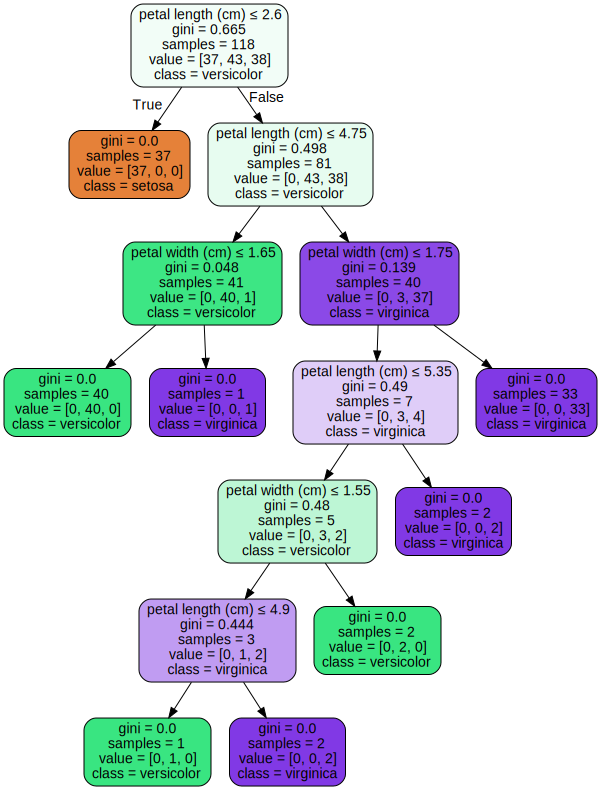

In [31]:
clf_petal = tree.DecisionTreeClassifier()
clf_petal = clf_petal.fit(train[['petal length (cm)','petal width (cm)']], y_classes)

dot_data_petal = tree.export_graphviz(clf_petal, out_file=None, 
                         feature_names=iris.feature_names[2:4],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data_petal)  
graph

**Comparaison des arbres :**

L'arbre construit à partir des attributs sur les sépales a une profondeur de 12, celui avec les pétales de 7.

Comme l'arbre avec tous les attributs, celui construit avec les pétales permet dès le premier noeud d'isoler les "setosa". L'autre arbre est beaucoup plus complexe. Il paraît une meilleure solution de garder les attributs sur les pétales.

Etudions les performances de ces arbres.

In [32]:
class_pred_petal = clf_petal.predict(test[['petal length (cm)','petal width (cm)']])
class_pred_sepal = clf_sepal.predict(test[['sepal length (cm)','sepal width (cm)']])
class_reelle = pd.factorize(test['species'])[0]

erreur_petal = len(np.where(class_pred_petal != class_reelle)[0])/len(test)
erreur_sepal = len(np.where(class_pred_sepal != class_reelle)[0])/len(test)


print("Erreur sur l'ensemble de test en utilisant les mesures de pétales = ", erreur_petal*100, "%")
print("Erreur sur l'ensemble de test en utilisant les mesures de sépales = ", erreur_sepal*100, "%")

Erreur sur l'ensemble de test en utilisant les mesures de pétales =  3.125 %
Erreur sur l'ensemble de test en utilisant les mesures de sépales =  25.0 %


En plus d'être plus complexe, l'arbre des sépales est très peu performant.
Les attributs les plus déterminants sont ceux sur les pétales.

N'utiliser que ces deux attributs donne une erreur équivalente à l'erreur avec tous les attributs : c'est en fait le même arbre.

Le critère de séparation par défaut pour construire les arbres précédents est le critère de Gini. Essayons de construire un arbre à partir des attributs les plus déterminants (ceux sur les pétales) avec un autre critère de séparation, par exemple fondé sur l'entropie.

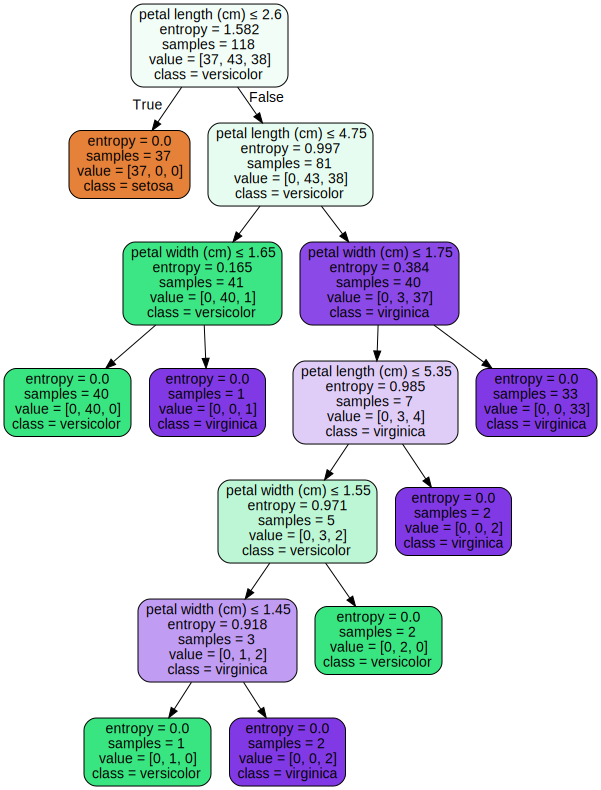

In [33]:
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy")
clf_entropy = clf_entropy.fit(train[['petal length (cm)','petal width (cm)']], y_classes)

dot_data_entropy = tree.export_graphviz(clf_entropy, out_file=None, 
                         feature_names=iris.feature_names[2:4],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data_entropy)
graph

Utiliser un autre critère de décision ne paraît pas changer l'arbre. On retrouve les mêmes caractérisiques que décrites auparavant.

### Going further ahead (not mandatory) 
Try the same approach adapted to another toy dataset from `scikit-learn` described at:
http://scikit-learn.org/stable/datasets/index.html

Play with another dataset available at:
http://archive.ics.uci.edu/ml/datasets.html

## Step 4: Random forests
Go to 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

for a documentation about the `RandomForestClassifier` provided by `scikit-learn`.

Since target values must be integers, we first need to transform labels into numbers as below.

In [34]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y_classes = pd.factorize(train['species'])[0]

# View target
y_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [77]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(n_jobs=2, random_state=0, oob_score = True)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train[features], y_classes)

C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

**Make predictions** and create actual english names for the plants for each predicted plant class:

In [78]:
preds = rf.predict(test[features])
preds_names = pd.Categorical.from_codes(preds, iris.target_names)
preds_names

[setosa, setosa, setosa, setosa, setosa, ..., virginica, virginica, virginica, virginica, virginica]
Length: 32
Categories (3, object): [setosa, versicolor, virginica]

### Create a confusion matrix

In [37]:
# Create confusion matrix unsing pandas:
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


## Feature selection using random forests byproducts

One of the interesting use cases for random forest is feature selection. One of the byproducts of trying lots of decision tree variations is that you can examine which variables are working best/worst in each tree.

When a certain tree uses one variable and another doesn't, you can compare the value lost or gained from the inclusion/exclusion of that variable. The good random forest implementations are going to do that for you, so all you need to do is know which method or variable to look at.

### View feature importance
While we don't get regression coefficients like with ordinary least squares (OLS), we do get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that petal width was more important in classification than sepal width.


In [66]:
# View a list of the features and their importance scores
list(zip(train[features], rf.feature_importances_))

[('sepal length (cm)', 0.11185992930506346),
 ('sepal width (cm)', 0.016341813006098178),
 ('petal length (cm)', 0.36439533040889194),
 ('petal width (cm)', 0.5074029272799464)]

## Exercise 3
1. Comment on the feature importances with respect to your previous observations on decision trees above.

2. Extract and visualize 5 trees belonging to the random forest using the attribute `estimators_` of the trained random forest classifier. Compare them. *Note that you may code a loop on extracted trees.*

3. Study the influence of parameters like `max_depth`, `min_samples_leaf` and `min_samples_split`. Try to optimize them and explain your approach and choices.

4. How is estimated the prediction error of a random forest ?
*Indication: have a look at parameter `oob_score`.*
What are out-of-bag samples ?

5. What should you do when classes are not balanced in the dataset ? (that is when there are much more examples of one class than another)

Comme on a pu l'observer précedemment, la largeur des pétales a le score d'importance le plus grand, c'est l'attribut le plus déterminant, alors que les données sur les sépales sont peu informatifs.

Extraction de plusieurs arbres de la forêt :

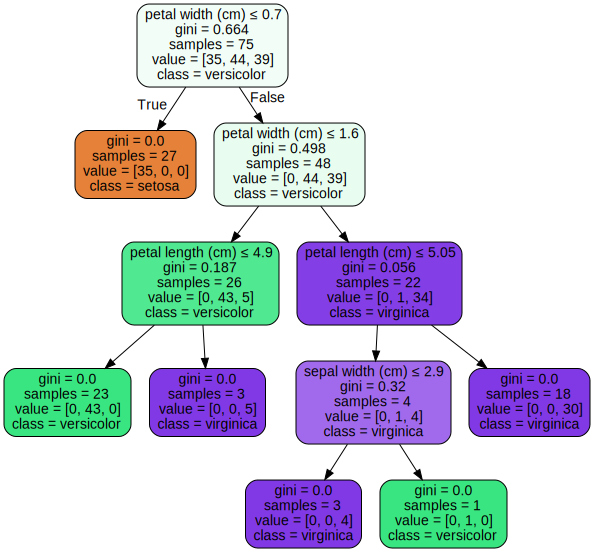

In [77]:
dot_data = tree.export_graphviz(rf.estimators_[1], out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph =  graphviz.Source(dot_data)
graph

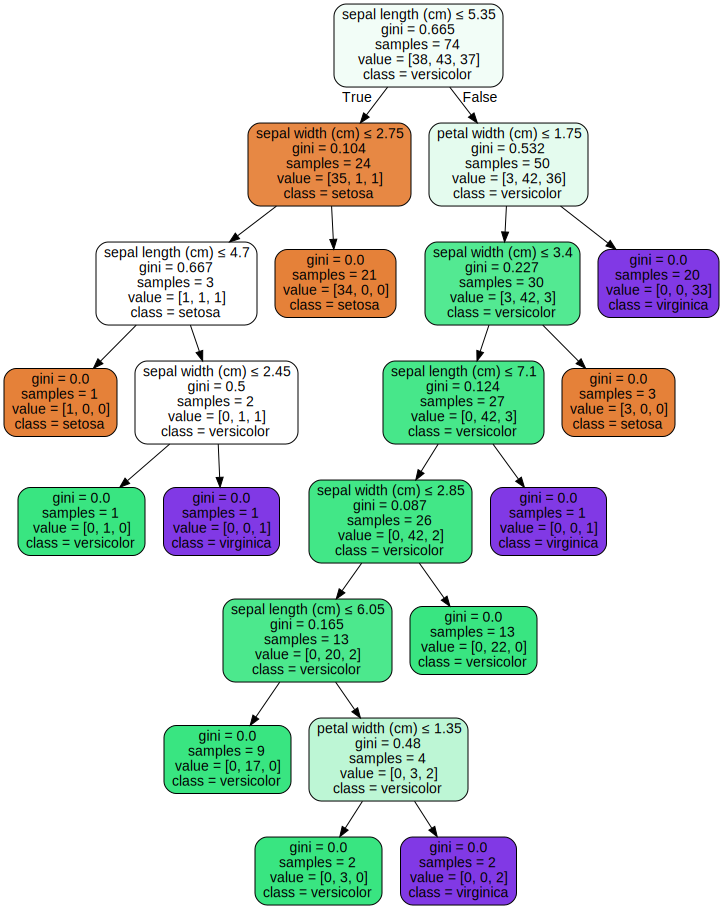

In [48]:
dot_data = tree.export_graphviz(rf.estimators_[3], out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph =  graphviz.Source(dot_data)
graph

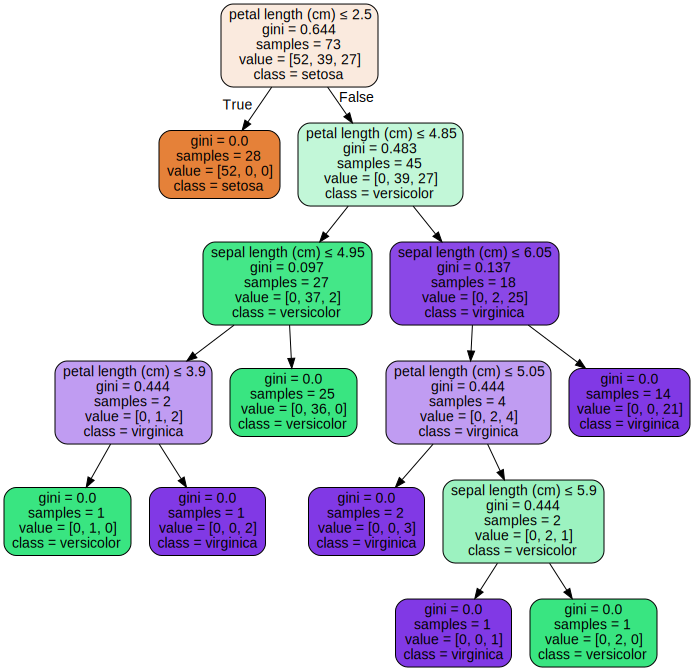

In [49]:
dot_data = tree.export_graphviz(rf.estimators_[7], out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph =  graphviz.Source(dot_data)
graph

Presque tous les arbres séparent les setosa au noeud 1, et sont de profondeur 4 ou 5. Le deuxième arbre observé ici fonctionne différemment car il commence par analyser l'attribut "sepal length" qui est l'un des moins déterminant.
 
On peut remarquer que différents attributs sont utilisés en fonction des arbres, autant sur les pétales que sur les sépales. Utiliser une forêt aléatoire permet un apprentissage plus complet.

**Etude des paramètres**

- max_depth : impose une profondeur maximale aux arbres, sans maximum par défaut
- min_samples_leaf : quand on arrive à ce nombre minimum d'échantillon, le noeud devient une feuille et on arrête la division, 1 par défaut
- min_samples_split : le nombre d'échantillon minimal pour faire une nouvelle séparation à ce noeud, 2 par défaut

En observant les arbres précédents, on décide que les noeuds deviennent des feuilles à partir de 3 échantilons et non plus 1, car cela rajoute plusieurs opérations pour de très petits sous-ensembles. On fixe alors une profondeur maximale de 5. Comparons la matrice de confusion ainsi obtenue avec la précédente.  

In [74]:
rf2 = RandomForestClassifier(n_jobs=2, random_state=0, max_depth=4, min_samples_leaf = 3, oob_score = True)


rf2.fit(train[features], y_classes)
preds2 = rf2.predict(test[features])
preds_names2 = pd.Categorical.from_codes(preds2, iris.target_names)

pd.crosstab(test['species'], preds2, rownames=['Actual Species'], colnames=['Predicted Species'])

C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,6,1
virginica,0,0,12


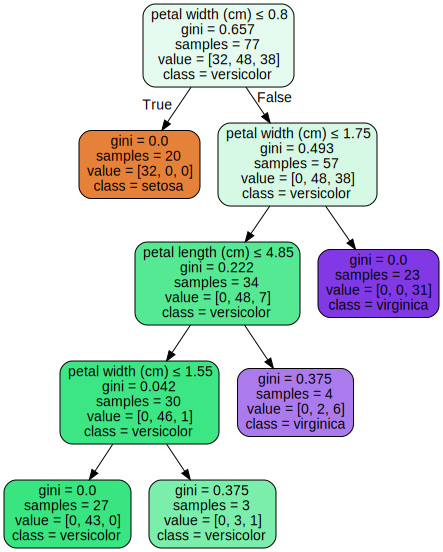

In [75]:
dot_data = tree.export_graphviz(rf2.estimators_[4], out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph =  graphviz.Source(dot_data)
graph

On a ainsi simplifié les arbres, et on voit que sur le test set les résultats n'en ont pas pâti, puisqu'on n'a eu qu'une seule erreur au lieu de 2 auparavant, de versicolor prédit comme virginia.

Ici, ce n'est a priori pas grave de faire cette confusion, mais dans certaines application, il peut être dangereux de faire ne serait-ce qu'une erreur. Selon la situation, il n'est alors pas nécessairement judicieux de simplifier les arbres comme nous l'avons fait, il faut être prudent.

**Mesure de l'erreur pour une forêt aléatoire**

http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py

Le paramètre oob_score, si on l'active à true, permet de mesurer la précision de nos forêts aléatoires. Il calcule l'erreur moyenne pour chaque observation en prenant la prédiction des arbres ne contenant pas cette observation pour leur ensemble d'apprentissage.
On rajoute ce paramètre dans la construction des forêts aléatoires précédentes

In [79]:
print("Score de la random forest de départ : ",rf.oob_score_, "\nScore de la random forest paramétrisée : ", rf2.oob_score_)

Score de la random forest de départ :  0.957627118644 
Score de la random forest paramétrisée :  0.949152542373


La forêt aléatoire de départ est plus précise de presque 1% sur le train set, ce qu'on avait pas pu voir seulement avec le test set et la matrice de confusion.

## Step 5: a small example of regression using random forests
Random forest is capable of learning without carefully crafted data transformations. Take the the $f(x) = \sin(x)$ function for example.

Create some fake data and add a little noise.

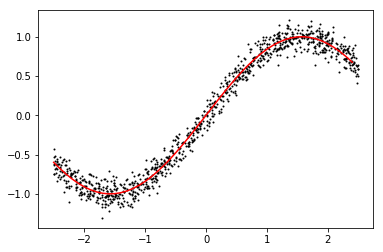

In [81]:
x = np.random.uniform(-2.5, 2.5, 1000)
y = np.sin(x) + np.random.normal(0, .1, 1000)

plt.plot(x,y,'ko',markersize=1,label='data')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.show()

If we try and build a basic linear model to predict y using x we end up with a straight line that sort of bisects the sin(x) function. Whereas if we use a random forest, it does a much better job of approximating the sin(x) curve and we get something that looks much more like the true function.

Based on this example, we will illustrate how the random forest isn't bound by linear constraints.

## Exercise 4
1. Apply random forests on this dataset for regression and compare performances with ordinary least squares regression.
*Note that ordinay least square regression is available thanks to:
from sklearn.linear_model import LinearRegression*

2. Comment on your results.

### Indications:
You may use half of points for training and others to test predictions. Then you will have an idea of how far the random forest predictor fits the sinus curve.

To this aim, you will need to use the model `RandomForestRegressor`. Be careful that when only 1 feature `x` is used as an input, you will need to reshape it by `x.reshape(-1,1)` when using methods `fit` and `predict`.

In [85]:
regrf = RandomForestRegressor(n_estimators=30, max_depth=4)
regrf.fit(x[0::2].reshape(-1, 1),y[0::2])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [109]:
pred = regrf.predict(x[1::2].reshape(-1, 1))

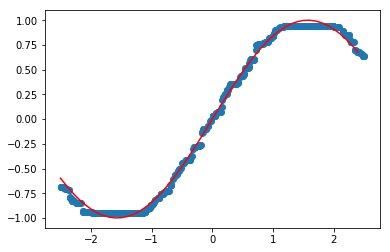

In [119]:
plt.scatter(x[1::2], pred)
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.show()

In [128]:
print("Erreur par rapport au sinus : ", sum(abs(pred - np.sin(x[1::2])))/len(pred))

Erreur par rapport au sinus :  0.0320197614411


Même en introduisant de petites variations, la prédiction par random forest permet de prédire un sinus avec beaucoup de précision, ce qu'on ne peut pas faire par simple régression linéaire.

In [126]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x[0::2].reshape(-1, 1),y[0::2])
pred_lin = lin.predict(x[1::2].reshape(-1, 1))

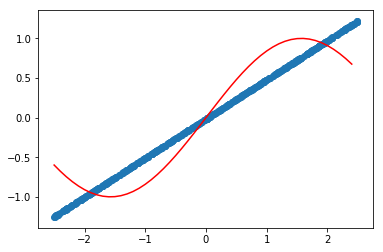

In [127]:
plt.scatter(x[1::2], pred_lin)
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.show()

In [129]:
print("Erreur par rapport au sinus : ", sum(abs(pred_lin - np.sin(x[1::2])))/len(pred))

Erreur par rapport au sinus :  0.243246633167


### Indication
One clever way to compare models when using `scikit-learn`is to make a loop on models as follows:

In [ ]:
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators)]

for model in models:
    ...
    


## Documentation

### Decision trees
http://scikit-learn.org/stable/modules/tree.html

### Random forests
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Plot decision surface : using `plt.contourf`
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py


## Pruning trees: not available in scikit-learn.
Since post-pruning of tree is not implemented in scikit-learn, you may think of coding your own pruning function. For instance, taking into account the numer of samples per leaf as proposed below:

In [ ]:
# Pruning function (useful ?)
def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1
                